# This script is to analyze data provided by COOPS
## File location: E:\VDATUM\Data\USA_NY_Complete_List_Final_07Apr2016.xls
## In this file, there are three sheets containing
* Geodetic_Ties
* Harmonics
* Tidal_Datums

<b>2016-10-26  Dr. Liang Kuang<\b>

In [1]:
def get_ngs_coastline(shapefile=r"E:\HSOFS\Data\CUSP\North_Atlantic.shp",layer="North_Atlantic"):
    from osgeo import ogr

    #shapefile =r'E:\HSOFS\Data\CUSP\North_Atlantic.shp'   
    driver = ogr.GetDriverByName("ESRI Shapefile")
    dataSource = driver.Open(shapefile,0)
    layer = dataSource.GetLayer("North_Atlantic")
    points = []
    for feat in layer:
        geom = feat.GetGeometryRef().GetPoints()
        geom.append((np.nan,np.nan))
        points.extend(geom)
        
    coastline_array = np.asarray(points)
    #plt.figure(num=1,figsize=(5,5),dpi=200)
    #plt.plot(locs[:,0],locs[:,1],'r-')       
    return coastline_array

In [2]:
import os, matplotlib,sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
sys.path.append(r'C:\python_libraries')

In [4]:
coastline = r'C:\Matlab_toolbox\surgeLAB\data\coastlines\usa.dat'
latest_cst = get_ngs_coastline(r"E:\HSOFS\Data\CUSP\North_Atlantic.shp","North_Atlantic")
cst = pd.read_csv(coastline,delim_whitespace=True, names = ['Lon','Lat'],na_values = 'NaN')
colormap = plt.cm.jet

In [5]:
DataDir = r'E:\VDATUM\Data'
filename = r'USA_NY_Complete_List_Final_07Apr2016.xls'
excelfilename = os.path.join(DataDir,filename)

In [6]:
xl = pd.ExcelFile(excelfilename)

In [7]:
print(xl.sheet_names)

[u'Geodetic_Ties', u'Harmonics', u'Tidal_Datums']


In [8]:
df_tidal_datums = xl.parse("Tidal_Datums")

In [9]:
df_tidal_datums.head()

,STATION_ID (CO-OPS),Station Name (CO-OPS),Station Long (CO-OPS),Station Lat (CO-OPS),Epoch (CO-OPS),Published Average NAVD88 for tide station relative to Staff 0 (CO-OPS),MHHW relative to Staff 0 for tide station (CO-OPS),MHW relative to Staff 0 for tide station (CO-OPS),DTL relative to Staff 0 for tide station (CO-OPS),MTL relative to Staff 0 for tide station (CO-OPS),...,DHQ for tide station (CO-OPS),DLQ for tide station (CO-OPS),HWI for tide station (CO-OPS),LWI for tide station (CO-OPS),WL_MAX relative to Staff 0 for tide station (CO-OPS),WL_MIN relative to Staff 0 for tide station (CO-OPS),Lowest Astronomical Tide (CO-OPS),Highest Astronomical Tide (CO-OPS),Error in Meters,Error in Feet
0,8447435,"CHATHAM, LYDIA COVE",-69.951083,41.688472,1983-2001,2.034,2.957,2.834,1.980,1.955,...,0.123,0.072,4.660,11.100,3.858,0.573,NAN,NAN,0.011962,0.039247
1,8447495,SAQUATUCKET HARBOR,-70.056700,41.668300,1983-2001,2.326,2.863,2.758,2.201,2.190,...,0.106,0.085,4.504,10.197,NAN,NAN,NAN,NAN,0.016461,0.054006
2,8447505,"CHATHAM, STAGE HARBOR",-69.966700,41.666700,1983-2001,1.767,2.344,2.232,1.647,1.630,...,0.113,0.080,4.504,10.250,NAN,NAN,NAN,NAN,0.020276,0.066523
3,8447605,HYANNISPORT,-70.300000,41.631700,1983-2001,NAN,4.932,4.825,4.353,4.338,...,0.108,0.078,4.737,10.373,NAN,NAN,3.522,5.232,0.017588,0.057703
4,8447685,"CHAPPAQUOIT POINT, BUZZARDS BAY",-70.651700,41.605000,1983-2001,NAN,2.472,2.392,1.825,1.809,...,0.081,0.049,0.369,6.049,NAN,NAN,0.864,2.837,0.019027,0.062425


In [10]:
df_tidal_datums.columns

Index([u'STATION_ID (CO-OPS)', u'Station Name (CO-OPS)',
       u'Station Long (CO-OPS)', u'Station Lat (CO-OPS)', u'Epoch (CO-OPS)',
       u'Published Average NAVD88 for tide station relative to Staff 0 (CO-OPS)',
       u'MHHW relative to Staff 0 for tide station (CO-OPS) ',
       u'MHW relative to Staff 0 for tide station (CO-OPS) ',
       u'DTL relative to Staff 0 for tide station (CO-OPS) ',
       u'MTL relative to Staff 0 for tide station (CO-OPS) ',
       u'MSL relative to Staff 0 for tide station (CO-OPS) ',
       u'MLW relative to Staff 0 for tide station (CO-OPS) ',
       u'MLLW relative to Staff 0 for tide station (CO-OPS) ',
       u'GT for tide station (CO-OPS) ', u'MN for tide station (CO-OPS) ',
       u'DHQ for tide station (CO-OPS) ', u'DLQ for tide station  (CO-OPS)',
       u'HWI for tide station (CO-OPS) ', u'LWI for tide station  (CO-OPS)',
       u'WL_MAX relative to Staff 0 for tide station  (CO-OPS)',
       u'WL_MIN relative to Staff 0 for tide station (

In [11]:
cols = [col for col in df_tidal_datums.columns if col not in ['STATION_ID (CO-OPS)','Station Name (CO-OPS)','Station Long (CO-OPS)','Station Lat (CO-OPS)']]

In [12]:
df_tidal_datums[cols].describe()

,MHHW relative to Staff 0 for tide station (CO-OPS),MHW relative to Staff 0 for tide station (CO-OPS),DTL relative to Staff 0 for tide station (CO-OPS),MTL relative to Staff 0 for tide station (CO-OPS),MLW relative to Staff 0 for tide station (CO-OPS),MLLW relative to Staff 0 for tide station (CO-OPS),GT for tide station (CO-OPS),MN for tide station (CO-OPS),DHQ for tide station (CO-OPS),DLQ for tide station (CO-OPS),HWI for tide station (CO-OPS),LWI for tide station (CO-OPS),Error in Meters,Error in Feet
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,3.583725,3.491192,2.875789,2.857157,2.222974,2.167839,1.415912,1.268283,0.092517,0.055166,2.249707,8.053887,0.014281,0.046855
std,2.579368,2.577633,2.536999,2.537898,2.522861,2.521763,0.528629,0.504981,0.017325,0.016097,2.204039,1.960080,0.005709,0.018729
min,-0.546000,-0.597000,-0.704000,-0.716000,-0.835000,-0.888358,0.168000,0.091000,0.037000,0.017000,0.013000,0.089000,0.000000,0.000000
25%,1.994750,1.894000,1.341750,1.327250,0.714500,0.657000,1.030000,0.914250,0.078000,0.043750,0.485250,6.636136,0.012398,0.040675
50%,2.676500,2.580500,1.908000,1.891000,1.215500,1.168500,1.364000,1.202000,0.095000,0.055000,1.648500,7.973500,0.014382,0.047186
75%,3.844750,3.763000,3.103000,3.081750,2.534750,2.477000,1.767250,1.608250,0.105000,0.068250,3.730000,9.913500,0.017322,0.056832
max,19.087000,19.012000,18.551000,18.539000,18.065000,18.014000,2.442000,2.253000,0.134000,0.088000,12.361000,12.190000,0.035100,0.115157


In [13]:
df_tidal_datums.replace('NAN',np.nan,inplace=True)


In [14]:
print(df_tidal_datums['Published Average NAVD88 for tide station relative to Staff 0 (CO-OPS)'][4])

nan


In [15]:
df_tidal_datums.isnull().any()

STATION_ID (CO-OPS)                                                       False
Station Name (CO-OPS)                                                     False
Station Long (CO-OPS)                                                     False
Station Lat (CO-OPS)                                                      False
Epoch (CO-OPS)                                                            False
Published Average NAVD88 for tide station relative to Staff 0 (CO-OPS)     True
MHHW relative to Staff 0 for tide station (CO-OPS)                        False
MHW relative to Staff 0 for tide station (CO-OPS)                         False
DTL relative to Staff 0 for tide station (CO-OPS)                         False
MTL relative to Staff 0 for tide station (CO-OPS)                         False
MSL relative to Staff 0 for tide station (CO-OPS)                          True
MLW relative to Staff 0 for tide station (CO-OPS)                         False
MLLW relative to Staff 0 for tide statio

In [16]:
df_tidal_datums[df_tidal_datums['Published Average NAVD88 for tide station relative to Staff 0 (CO-OPS)'].isnull()]

,STATION_ID (CO-OPS),Station Name (CO-OPS),Station Long (CO-OPS),Station Lat (CO-OPS),Epoch (CO-OPS),Published Average NAVD88 for tide station relative to Staff 0 (CO-OPS),MHHW relative to Staff 0 for tide station (CO-OPS),MHW relative to Staff 0 for tide station (CO-OPS),DTL relative to Staff 0 for tide station (CO-OPS),MTL relative to Staff 0 for tide station (CO-OPS),...,DHQ for tide station (CO-OPS),DLQ for tide station (CO-OPS),HWI for tide station (CO-OPS),LWI for tide station (CO-OPS),WL_MAX relative to Staff 0 for tide station (CO-OPS),WL_MIN relative to Staff 0 for tide station (CO-OPS),Lowest Astronomical Tide (CO-OPS),Highest Astronomical Tide (CO-OPS),Error in Meters,Error in Feet
3,8447605,HYANNISPORT,-70.300000,41.631700,1983-2001,NaN,4.932000,4.825000,4.353000,4.338000,...,0.108000,0.078000,4.737000,10.373000,NaN,NaN,3.522000,5.232000,0.017588,0.057703
4,8447685,"CHAPPAQUOIT POINT, BUZZARDS BAY",-70.651700,41.605000,1983-2001,NaN,2.472000,2.392000,1.825000,1.809000,...,0.081000,0.049000,0.369000,6.049000,NaN,NaN,0.864000,2.837000,0.019027,0.062425
5,8447712,"NEW BEDFORD, CLARKS POINT",-70.900000,41.593300,1983-2001,NaN,1.966000,1.890000,1.363000,1.347000,...,0.076000,0.044000,0.504000,6.304000,NaN,NaN,NaN,NaN,0.017090,0.056070
6,8447842,ROUND HILL POINT,-70.928300,41.538300,1983-2001,NaN,1.782000,1.700000,1.197000,1.177000,...,0.082000,0.041000,0.502000,6.287000,NaN,NaN,NaN,NaN,0.014049,0.046094
8,8448157,"VINEYARD HAVEN, VINEYARD HVN HBR",-70.600000,41.458300,1983-2001,NaN,2.000000,1.886000,1.676000,1.643000,...,0.114000,0.048000,3.910000,9.371000,NaN,NaN,NaN,NaN,0.016602,0.054468
9,8448248,PENIKESE ISLAND,-70.921700,41.450000,1983-2001,NaN,2.033000,1.958000,1.455000,1.438000,...,0.075000,0.041000,0.295000,6.095000,NaN,NaN,NaN,NaN,0.012351,0.040523
10,8448251,QUICK'S HOLE,-70.856700,41.448300,1983-2001,NaN,3.214416,3.143426,2.708226,2.684133,...,0.070989,0.022802,0.210000,5.900000,NaN,NaN,NaN,NaN,0.017565,0.057628
11,8448376,CUTTYHUNK,-70.916700,41.425000,1983-2001,NaN,2.521000,2.449000,1.953000,1.936000,...,0.073000,0.037000,1.336000,7.157000,NaN,NaN,NaN,NaN,0.018713,0.061393
12,8448558,"EDGARTOWN, MARTHA'S VINEYARD",-70.511700,41.388300,1983-2001,NaN,2.251049,2.154099,1.843017,1.829286,...,0.096949,0.069489,4.700000,10.190000,NaN,NaN,1.299149,2.395149,0.019681,0.064569
13,8448725,MENEMSHA HARBOR,-70.767833,41.354444,1983-2001,NaN,8.650000,8.572000,8.172000,8.152000,...,0.078000,0.038000,0.600000,6.770000,9.345,7.194,7.547000,8.863000,0.008590,0.028182


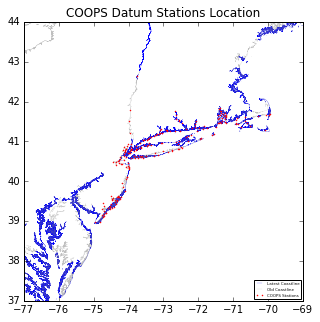

In [17]:
fig,ax = plt.subplots(num=1,nrows=1,ncols = 1,figsize = (5,5),dpi=500)
ax.plot(latest_cst[:,0],latest_cst[:,1],linewidth = 0.2, color='blue',label='Latest Coastline',alpha=1)
ax.set_xlim([-77, -69])
ax.set_ylim([37,44])
ax.plot(cst.Lon,cst.Lat,linestyle='-',linewidth = 0.2, color='grey',label='Old Coastline',alpha=0.5)
ax.plot(df_tidal_datums['Station Long (CO-OPS)'],df_tidal_datums['Station Lat (CO-OPS)'],linestyle='',marker='o',markersize=1,mec='red',mfc='red',label='COOPS Stations')
ax.set_title("COOPS Datum Stations Location")
ax.legend(fontsize=4,loc=4)
picname = os.path.join(DataDir,'plots','COOPS_Datum_Stations_Location')
plt.savefig(picname,dpi=500,bbox_layout='tight')

In [18]:
xl.sheet_names

[u'Geodetic_Ties', u'Harmonics', u'Tidal_Datums']

In [19]:
df_harmonics = xl.parse('Harmonics')

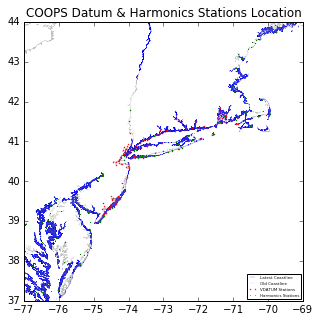

In [20]:
fig,ax = plt.subplots(num=1,nrows=1,ncols = 1,figsize = (5,5),dpi=500)
ax.plot(latest_cst[:,0],latest_cst[:,1],linewidth = 0.2, color='blue',label='Latest Coastline',alpha=1)
ax.set_xlim([-77, -69])
ax.set_ylim([37,44])
ax.plot(cst.Lon,cst.Lat,linestyle='-',linewidth = 0.2, color='grey',label='Old Coastline',alpha=0.5)
ax.plot(df_tidal_datums['Station Long (CO-OPS)'],df_tidal_datums['Station Lat (CO-OPS)'],linestyle='',marker='o',markersize=1,mec='red',mfc='red',alpha=0.8,label='VDATUM Stations')
ax.plot(df_harmonics['LONGITUDE'],df_harmonics['LATITUDE'],linestyle='',marker='o',markersize=0.5,mec='green',mfc='green',alpha=0.6,label='Harmonics Stations')
ax.set_title("COOPS Datum & Harmonics Stations Location")
ax.legend(fontsize=4,loc=4)
picname = os.path.join(DataDir,'plots','COOPS_Datum_Harmonics_Stations_Location')
plt.savefig(picname,dpi=500,bbox_layout='tight')

In [21]:
T_CO_Merged = r'E:\VDATUM\T\CO\merged_20160921.dat'

In [22]:
df_t_co_merged = pd.read_fwf(T_CO_Merged,sep='\+s',header=1,skiprows=0,widths=[7,12,12,10,8,8,8,8,45,8,9,10])

In [23]:
df_t_co_merged.head()

,STATION,LATITUDE,LONGITUDE,MHHW(m),MHW,MLW,MLLW,NAVD88,STATION_NAME,S_POS,S_TD S,_NAVD88
0,1611347,21.903333,-159.591667,0.307,0.185,-0.194,-0.254,-9.999,"ORT ALLEN, HANAPEPE BAY, KAUAI ISLAND HAWAII",s:WWW1,2003.0421,2003.0421
1,1611400,21.955000,-159.356667,0.306,0.182,-0.191,-0.252,-9.999,"AWILIWILI, NAWILIWILI HARBOR, KAUAI HAWAII",s:WWW1,2003.0421,2003.0421
2,1612340,21.306667,-157.866667,0.329,0.188,-0.201,-0.251,-9.999,"ONOLULU, HONOLULU HARBOR, OAHU ISLAND HAWAII",s:WWW1,2003.1212,2003.1212
3,1612366,21.330000,-157.966667,0.330,0.189,-0.207,-0.251,-9.999,"ORT KAMEHAMEHA, BISHOP POINT, PEARL HBR HAWA",s:WWW1,2003.0421,2003.0421
4,1612404,21.368333,-157.940000,0.331,0.193,-0.217,-0.261,-9.999,"ORD ISLAND, FERRY DOCK, PEARL HARBOR HAWAII",s:WWW1,2003.0421,2003.0421


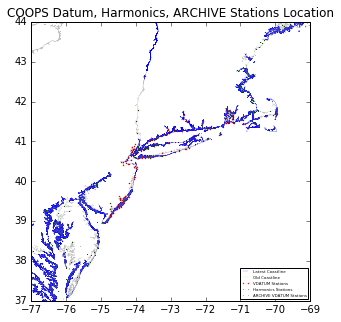

In [24]:
fig,ax = plt.subplots(num=1,nrows=1,ncols = 1,figsize = (5,5),dpi=500)
ax.plot(latest_cst[:,0],latest_cst[:,1],linewidth = 0.2, color='blue',label='Latest Coastline',alpha=1)
ax.set_xlim([-77, -69])
ax.set_ylim([37,44])
ax.plot(cst.Lon,cst.Lat,linestyle='-',linewidth = 0.2, color='grey',label='Old Coastline',alpha=0.5)
ax.plot(df_tidal_datums['Station Long (CO-OPS)'],df_tidal_datums['Station Lat (CO-OPS)'],linestyle='',marker='o',markersize=1,mec='red',mfc='red',alpha=0.8,label='VDATUM Stations')
ax.plot(df_harmonics['LONGITUDE'],df_harmonics['LATITUDE'],linestyle='',marker='o',markersize=0.5,mec='green',mfc='green',alpha=0.6,label='Harmonics Stations')
ax.plot(df_t_co_merged['LONGITUDE'],df_t_co_merged['LATITUDE'],linestyle='',marker='d',markersize=0.3,mec='black',mfc='black',alpha=0.5,label='ARCHIVE VDATUM Stations')
ax.set_title("COOPS Datum, Harmonics, ARCHIVE Stations Location")
ax.legend(fontsize=4,loc=4)
picname = os.path.join(DataDir,'plots','COOPS_Datum_Harmonics_ARCHIVE_Stations_Location')
plt.savefig(picname,dpi=500,bbox_layout='tight')

In [25]:
df_harmonics['STATION_ID'].unique()

array([1611347, 1611400, 1612340, 1612366, 1612404, 1612480, 1613198,
       1615680, 1617433, 1617760, 1619000, 1619910, 1630000, 1631428,
       1633227, 1732417, 1770000, 1778000, 1820000, 1840000, 1890000,
       1910000, 2695540, 8410140, 8410714, 8410715, 8410834, 8410864,
       8411060, 8411250, 8412581, 8413320, 8413801, 8413825, 8414249,
       8414612, 8414721, 8414888, 8415490, 8415709, 8416731, 8416921,
       8417087, 8417134, 8417144, 8417177, 8417208, 8417227, 8418150,
       8418445, 8418606, 8418828, 8418911, 8419317, 8419870, 8420411,
       8423898, 8440273, 8440369, 8440452, 8440466, 8440889, 8441241,
       8441551, 8441771, 8442645, 8443187, 8443662, 8443725, 8443970,
       8444162, 8444525, 8444788, 8445138, 8446009, 8446121, 8446166,
       8446493, 8447173, 8447180, 8447191, 8447241, 8447259, 8447270,
       8447295, 8447368, 8447386, 8447416, 8447435, 8447495, 8447505,
       8447605, 8447685, 8447712, 8447842, 8447930, 8448157, 8448248,
       8448558, 8448

In [26]:
df_harmonics.index = df_harmonics['STATION_ID']

In [27]:
df_harmonics.index

Index([1611347, 1611347, 1611347, 1611347, 1611347, 1611347, 1611347, 1611347,
       1611347, 1611347,
       ...
        u'NAN',  u'NAN',  u'NAN',  u'NAN',  u'NAN',  u'NAN',  u'NAN',  u'NAN',
        u'NAN',  u'NAN'],
      dtype='object', name=u'STATION_ID', length=36534)

In [28]:
df_harmonics.loc[1611347]

,HARM#,STATION_ID,NAME,LONGITUDE,LATITUDE,CONST#,CONST_NAME,AMPLITUDE,PHASE,BEGIN_DATE_TIME,END_DATE_TIME,TIME_MERIDIAN,TIME_MER_DIR,ALGORITHM,STATUS,STATUS_DATE_TIME,COMMENTS
STATION_ID,,,,,,,,,,,,,,,,,
1611347,1505,1611347,"PORT ALLEN, HANAPEPE BAY, KAUAI ISLAND",-159.592,21.9033,1,M2,0.159106,44.1,NAN,NAN,0,W,CEOB,A,2001-12-10 18:11:57.200,Source of Constituents: Mean of 5 NOS one year...
1611347,1505,1611347,"PORT ALLEN, HANAPEPE BAY, KAUAI ISLAND",-159.592,21.9033,2,S2,0.066446,38.3,NAN,NAN,0,W,CEOB,A,2001-12-10 18:11:57.200,Source of Constituents: Mean of 5 NOS one year...
1611347,1505,1611347,"PORT ALLEN, HANAPEPE BAY, KAUAI ISLAND",-159.592,21.9033,3,N2,0.029566,38.3,NAN,NAN,0,W,CEOB,A,2001-12-10 18:11:57.200,Source of Constituents: Mean of 5 NOS one year...
1611347,1505,1611347,"PORT ALLEN, HANAPEPE BAY, KAUAI ISLAND",-159.592,21.9033,4,K1,0.163982,226.5,NAN,NAN,0,W,CEOB,A,2001-12-10 18:11:57.200,Source of Constituents: Mean of 5 NOS one year...
1611347,1505,1611347,"PORT ALLEN, HANAPEPE BAY, KAUAI ISLAND",-159.592,21.9033,5,M4,0,0,NAN,NAN,0,W,CEOB,A,2001-12-10 18:11:57.200,Source of Constituents: Mean of 5 NOS one year...
1611347,1505,1611347,"PORT ALLEN, HANAPEPE BAY, KAUAI ISLAND",-159.592,21.9033,6,O1,0.086258,221.5,NAN,NAN,0,W,CEOB,A,2001-12-10 18:11:57.200,Source of Constituents: Mean of 5 NOS one year...
1611347,1505,1611347,"PORT ALLEN, HANAPEPE BAY, KAUAI ISLAND",-159.592,21.9033,7,M6,0,0,NAN,NAN,0,W,CEOB,A,2001-12-10 18:11:57.200,Source of Constituents: Mean of 5 NOS one year...
1611347,1505,1611347,"PORT ALLEN, HANAPEPE BAY, KAUAI ISLAND",-159.592,21.9033,8,MK3,0,0,NAN,NAN,0,W,CEOB,A,2001-12-10 18:11:57.200,Source of Constituents: Mean of 5 NOS one year...
1611347,1505,1611347,"PORT ALLEN, HANAPEPE BAY, KAUAI ISLAND",-159.592,21.9033,9,S4,0,0,NAN,NAN,0,W,CEOB,A,2001-12-10 18:11:57.200,Source of Constituents: Mean of 5 NOS one year...


In [29]:
from ADCIRC.Grid.Read_Grid import Read_Grid

ImportError: cannot import name Read_Grid